<a href="https://colab.research.google.com/github/tensorvijay/Mtechcen/blob/master/19015_A6_18CN711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/My Drive/Thirdsem/DLforA/Assign_6/COVID19_dataset.zip'

Archive:  /content/drive/My Drive/Thirdsem/DLforA/Assign_6/COVID19_dataset.zip
  inflating: COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  inflating: COVID-19 Radiography Database/COVID-19/C

In [ ]:
import glob as glob
from keras.layers import Conv2D, MaxPooling2D , Dropout, concatenate,UpSampling2D
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import PIL.Image as im
from skimage.transform import resize
from skimage.transform import rotate
from skimage.color import rgb2gray
from skimage.color import gray2rgb
import random as rand
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
def readImage(address):
    x = im.open(address)
    x = np.array(x)
    x = resize(x,(128,128))
    x = gray2rgb(x)
    return(x)

In [ ]:
COV=glob.glob('/content/COVID-19 Radiography Database/COVID-19/*.png')
NOR=glob.glob('/content/COVID-19 Radiography Database/NORMAL/*.png')
VIR=glob.glob('/content/COVID-19 Radiography Database/Viral Pneumonia/*.png')

In [ ]:
A=readImage('/content/COVID-19 Radiography Database/COVID-19/COVID-19 (10).png')

In [ ]:
A.shape

(128, 128, 3)

In [ ]:
x_train=[]
for i in COV :
  x_train.append(kerasimg(i))

Loading the images into the respective files, after that load the images into an image data generator and

In [ ]:
for i in VIR :
  x_train.append(kerasimg(i))

In [ ]:
len(x_train)

1564

After loading the Viral images let us extract the features using VGG 16 Pre trained weights

In [ ]:
def kerasimg(ad):
  image = load_img(ad, target_size=(224, 224,3))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  return image


In [ ]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467904/553467096 [==============================] - 26s 0us/step


In [ ]:
len(x_train)

219

In [ ]:
abnorm_feat=[]
for i in x_train :
 abnorm_feat.append(model.predict(i))

In [ ]:
len(abnorm_feat)


1564

In [ ]:
abnorm_fa=np.asarray(abnorm_feat)

In [ ]:
abnorm_fa=abnorm_fa.reshape(1564,4096)

In [ ]:
abnorm_fa.shape

(1564, 4096)

In [ ]:
pca=PCA(n_components=1521)
dimen=pca.fit_transform(abnorm_fa)

In [ ]:
dimen.shape

(1564, 1521)

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(dimen)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
lab=kmeans.labels_

In [ ]:
clust1=dimen[lab==0] #abnormal 1
clust2=dimen[lab==1] #abnormal 2

Divide the data set into two cluster , this becomes the abnormal 1 and abnormal 2

In [ ]:
clust2.shape

(911, 1521)

Now reshape the array of clusters into to parts abnormal 1 and abnormal 2 as given in the paper

In [ ]:
clust1_=clust1.reshape(653,39,39)
clust2_=clust2.reshape(911,39,39)

example image of the features

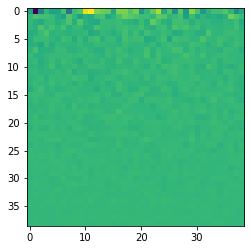

In [ ]:
plt.imshow(clust2_[100])

As you can see dimensionality reduction does not help much the features are not evidently visible, so instead of reducing the dimensionality let us try plotting the original image

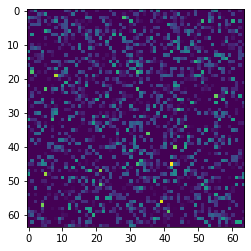

In [ ]:
image=abnorm_fa[0].reshape(64,64)
plt.imshow(image)

The features in the above image are better , than the one after dimensionality reduction.As a reuslt we will apply K means on the feature space of the orinignal image and not implement the dimensionality reducion. This is possibly becasue the size of our data set is very small and hence the number of principal components becomes extremely small

In [ ]:
kmeans_=KMeans(n_clusters=2)

In [ ]:

kmeans_.fit(abnorm_fa)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels=kmeans_.labels_

In [ ]:
clus1=abnorm_fa[labels==0]
clus2=abnorm_fa[labels==1]

In [ ]:
len(clus2)

653

THe number of clusters for both the cases are the same

In [ ]:
clus1_=clus1.reshape(911,64,64)
clus2_=clus2.reshape(653,64,64)

In [ ]:
x_train=[]
for i in clus1_ :
 x_train.append(gray2rgb(i))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


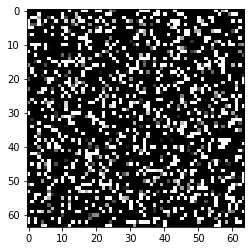

In [ ]:
plt.imshow(clus1_col[901])

In [ ]:
len(clus1_col)

911

In [ ]:
len(clus2_)

653

In [ ]:

for i in clus2_ :
 x_train.append(gray2rgb(i))

In [ ]:
len(x_train)

1564

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


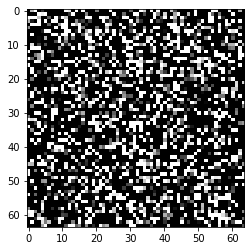

In [ ]:
plt.imshow(clus2_col[0])

Let us try the normal case now

In [ ]:
x_nor=[]
for i in NOR :
  x_nor.append(kerasimg(i))

In [ ]:
norm_feat=[]
for i in x_nor :
 norm_feat.append(model.predict(i))

In [ ]:
norm_feat=np.asarray(norm_feat)

In [ ]:
len(norm_feat)

1341

In [ ]:
norm_feat=np.asarray(norm_feat).reshape(1341,4096)

In [ ]:
kmeans1=KMeans(n_clusters=2)
kmeans1.fit(norm_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels1=kmeans1.labels_

In [ ]:
nclus1=norm_feat[labels1==0]
nclus2=norm_feat[labels1==1]

In [ ]:
len(nclus1)

659

In [ ]:
len(nclus2)

682

In [ ]:
nclus1_=nclus1.reshape(659,64,64)
nclus2_=nclus2.reshape(682,64,64)

In [ ]:

for i in nclus1_ :
 x_train.append(gray2rgb(i))
for i in nclus2_ :
 x_train.append(gray2rgb(i))

In [ ]:
y_train1=np.repeat(0,len(clus1_))
y_train=np.repeat()

In [ ]:
y_train=np.concatenate((np.repeat(0,len(clus1_)),np.repeat(1,len(clus2_)),np.repeat(2,len(nclus1)),np.repeat(3,len(nclus2))))

In [ ]:
len(x_train)

2905

world of the CNN

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


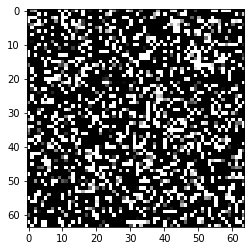

In [ ]:
plt.imshow(x_train[2341])

In [ ]:
len(y_train)

2905

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
np.savez_compressed('/content/drive/My Drive/Thirdsem/DLforA/Assign_6/train.npz',x_train,y_train)

In [ ]:
X=[]
for i in x_train:
 X.append(resize(i,(80,80)))

In [ ]:
X[20].shape

(80, 80, 3)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
Y=to_categorical(y_train,num_classes=4)

In [ ]:
len(Y)

2905

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [ ]:
_,X_val,_,Y_val=train_test_split(X_train,Y_train,test_size=0.33,random_state=42)

In [ ]:
X_train=np.asarray(X_train)

In [ ]:
X_val=np.asarray(X_val)

In [ ]:
Y_val.shape

(643, 4)

In [ ]:
aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

In [ ]:
filepath="/content/drive/My Drive/Thirdsem/DLforA/Assign_6/weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
base_model = keras.applications.InceptionResNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(80, 80, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

219062272/219055592 [==============================] - 5s 0us/step


In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD

In [ ]:
model=keras.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(4,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 1, 1, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 6148      
Total params: 54,342,884
Trainable params: 53,684,932
Non-trainable params: 657,952
_________________________________________________________________


In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
H = model.fit(
	x=aug.flow(X_train, Y_train, batch_size=32),
	steps_per_epoch=len(X_train)/32,
	validation_data=(X_val,Y_val),
	callbacks=callbacks_list,
	epochs=1000)

Epoch 1/1000
61/60 [==============================] - ETA: 0s - loss: 0.3611 - accuracy: 0.6650
Epoch 00001: accuracy improved from 0.66033 to 0.66495, saving model to /content/drive/My Drive/Thirdsem/DLforA/Assign_6/weights-improvement-01-0.66.hdf5
61/60 [==============================] - 24s 395ms/step - loss: 0.3611 - accuracy: 0.6650 - val_loss: 0.4797 - val_accuracy: 0.5350
Epoch 2/1000
61/60 [==============================] - ETA: 0s - loss: 0.3371 - accuracy: 0.7020
Epoch 00002: accuracy improved from 0.66495 to 0.70195, saving model to /content/drive/My Drive/Thirdsem/DLforA/Assign_6/weights-improvement-02-0.70.hdf5
61/60 [==============================] - 22s 360ms/step - loss: 0.3371 - accuracy: 0.7020 - val_loss: 0.5290 - val_accuracy: 0.4914
Epoch 3/1000
61/60 [==============================] - ETA: 0s - loss: 0.3256 - accuracy: 0.7184
Epoch 00003: accuracy improved from 0.70195 to 0.71840, saving model to /content/drive/My Drive/Thirdsem/DLforA/Assign_6/weights-improvement

In [ ]:
for keras.layers in base_model.layers[:70]:
  #count=count+1
  keras.layers.trainable=False

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
# load an image from file
image = load_img('/content/COVID-19 Radiography Database/COVID-19/COVID-19 (1).png', target_size=(224, 224,3))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# get extracted features
features = model.predict(image)
print(features.shape)
# save to file
#dump(features, open('dog.pkl', 'wb'))

(1, 4096)


In [ ]:
image.shape

(1, 224, 224, 3)

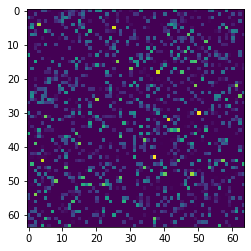

In [ ]:
plt.imshow(arr)

In [ ]:
len(COV_L)

219

In [ ]:
COV_L[0].shape

(128, 128, 3)

In [ ]:
x_train=np.zeros((len(COV_L),128,128,3))

In [ ]:
x_train.shape

(219, 128, 128, 3)

In [ ]:
for i in range(0,len(x_train)):
  x_train[i,:,:,:]=COV_L[i]


ValueError: ignored

In [ ]:
f=np.repeat(0,len(COV_L))
g=np.repeat(1,len(NOR_L))
h=np.repeat(2,len(VIR_L))

In [ ]:
g=np.repeat(0,len(NOR_L))
h=np.repeat(1,len(VIR_L))
lab=np.concatenate((g,h))

In [ ]:
np.where(lab==3)

(array([], dtype=int64),)

In [ ]:
NOR_L=[]
for i in NOR :
  NOR_L.append(readImage(i))

VIR_L=[]
for i in VIR :
  VIR_L.append(readImage(i))


In [ ]:
VIR_L[1].shape

(128, 128, 3)

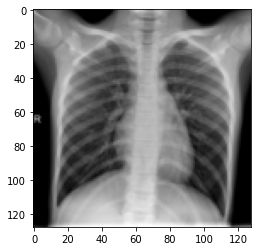

In [ ]:
plt.imshow(NOR_L[1])

In [ ]:
aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
model=keras.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile()

In [ ]:
COV_L[10].shape

(128, 128, 3)

In [ ]:
ar=np.asarray(NOR_L)

In [ ]:
ar1=np.asarray(VIR_L)

In [ ]:
x_train=np.concatenate((ar,ar1))

In [ ]:
y_train=np.concatenate((g,h))

In [ ]:
len(x_train)-len(y_train)

0

In [ ]:
y_train[2000]

2

In [ ]:
from keras.utils.np_utils import to_categorical

Y_Lab = to_categorical(lab,num_classes=2)

In [ ]:
Y_Lab.shape

(2686, 3)

In [ ]:
H = model.fit(
	x=aug.flow(x_train,Y_Lab, batch_size=32),
	steps_per_epoch=len(x_train)/32,
	epochs=10)